In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [3]:
df = pd.read_csv('data_all.csv')

df = df.drop(columns=['residue name','chain', 'position'])

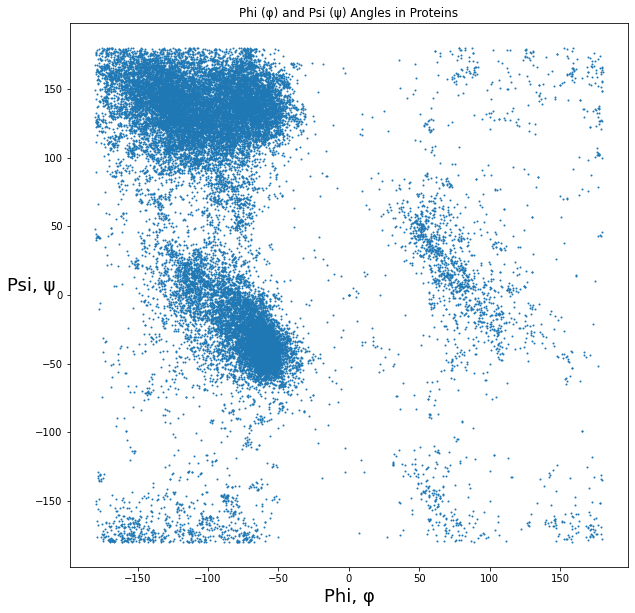

In [5]:
# Assign X, y values and plot
df.plot.scatter(x='phi', y='psi', s=1)

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins')
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

# Increase size of figure
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

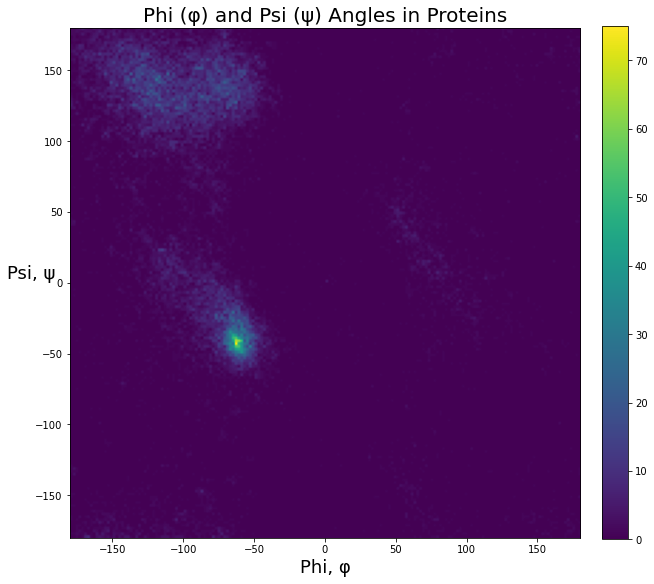

In [4]:
# Setup heatmap
heatmap, xedges, yedges = np.histogram2d(x=df['phi'], y=df['psi'], bins=(180, 180))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower')

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins', size=20)
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

plt.colorbar(fraction=0.046, pad=0.04)


# Increase size of figure
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

## Appropriate value for k

To select an appropriate value for k we created plots with  k-values ranging from 2-6. With these plots we used a silhouette score to determine a suitable k. We received the highest score with k = 3 as seen below.

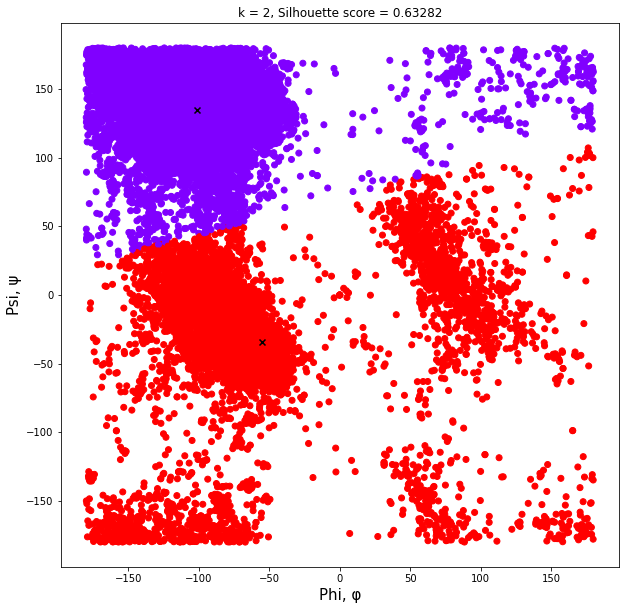

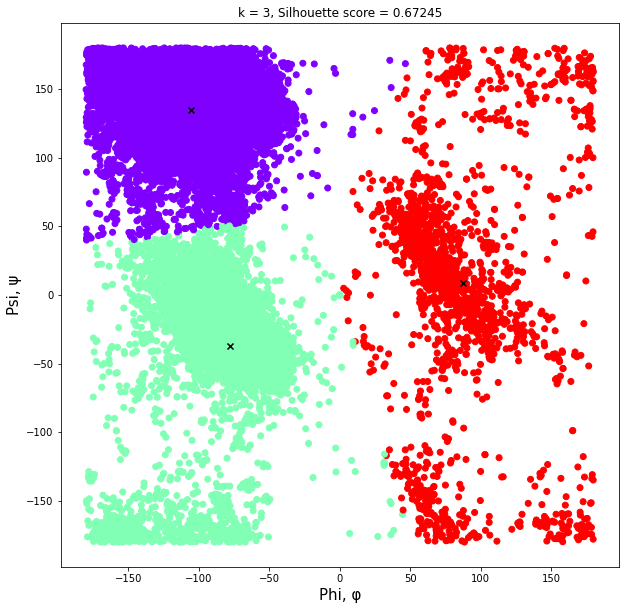

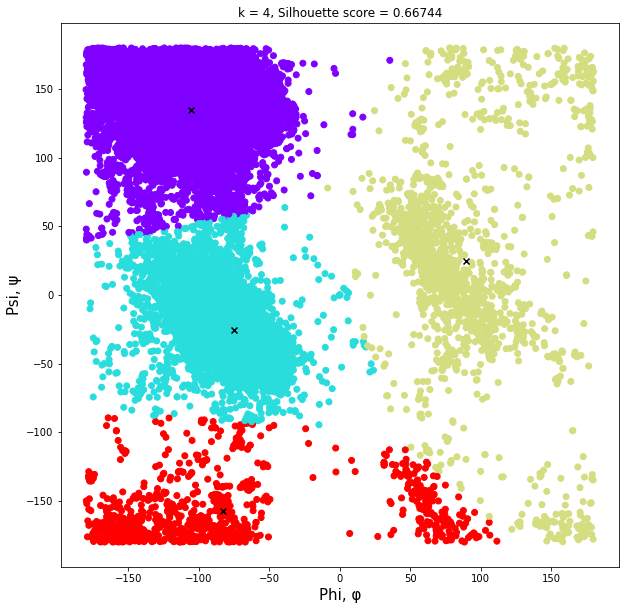

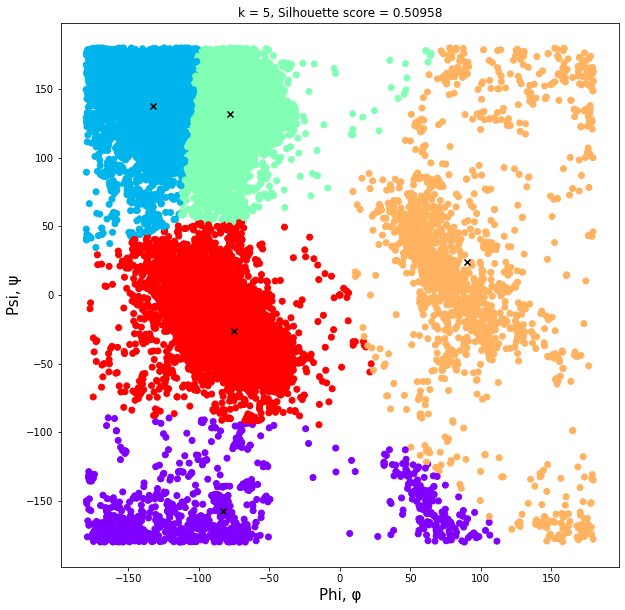

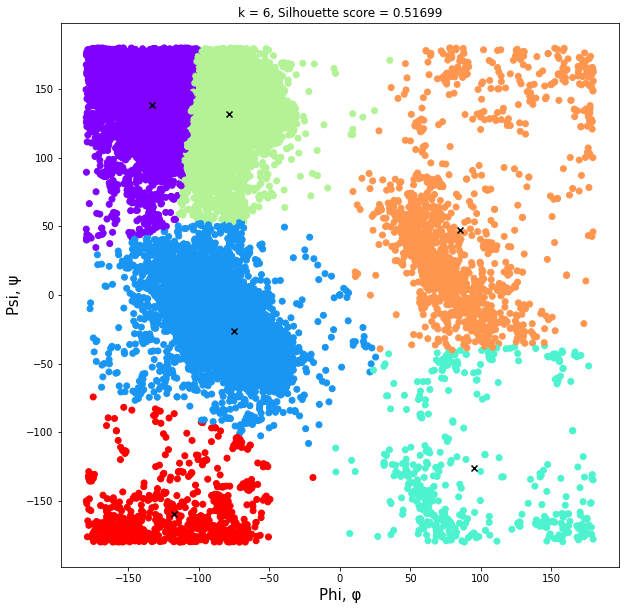

In [5]:
# Create a for loop that generates plots for k=2-6
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df[["phi", "psi"]])

    plt.scatter(x=df["phi"], y=df['psi'], 
                c=kmeans.labels_, 
                cmap='rainbow')

    plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                c='black', 
                marker='x')
        
    plt.title(f"k = {k}, Silhouette score = "
                     f"{silhouette_score(df[['phi', 'psi']], kmeans.labels_):,.5f}")
    plt.xlabel('Phi, φ', size=15)
    plt.ylabel('Psi, ψ', size=15)
    
    plt.show()

## Cluster reasonability
We find the clustering to be quite reasonable. Comparing our plot with k=3 to the heatmap we get a similiar groupings. Also, just looking at the different plot options, k=3 seems very reasonable.

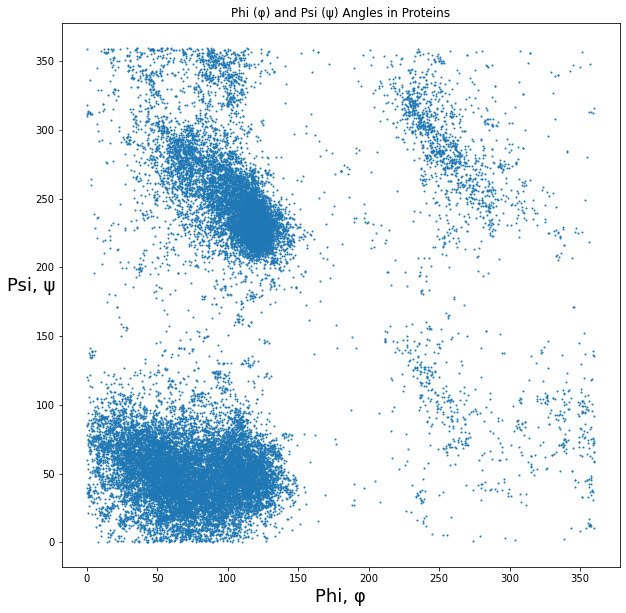

In [6]:
# Copy data
df_transform = df.copy()

# Transform data
df_transform['psi'] = (df_transform['psi'] + 270) % 360 
df_transform['phi'] = (df_transform['phi'] + 180) % 360

# Assign X, y values and plot
df_transform.plot.scatter(x='phi', y='psi', s=1)

# Create title and labels
plt.title('Phi (φ) and Psi (ψ) Angles in Proteins')
plt.xlabel('Phi, φ', size=18)
plt.ylabel('Psi, ψ', rotation="horizontal", size=18)

# Increase size of figure
plt.rcParams['figure.figsize'] = [10, 10]

plt.show()

## Shifting/translating
By rotating Psi and Phi we get a new composition and run the same loop with different k-values and generate new silhouette scores. Slightly surprisingly this time k = 4 gave the highest score, however k = 3 came extremely close.

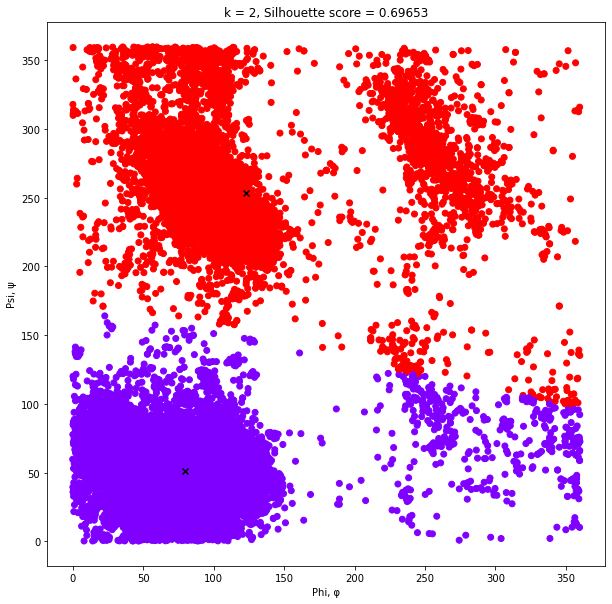

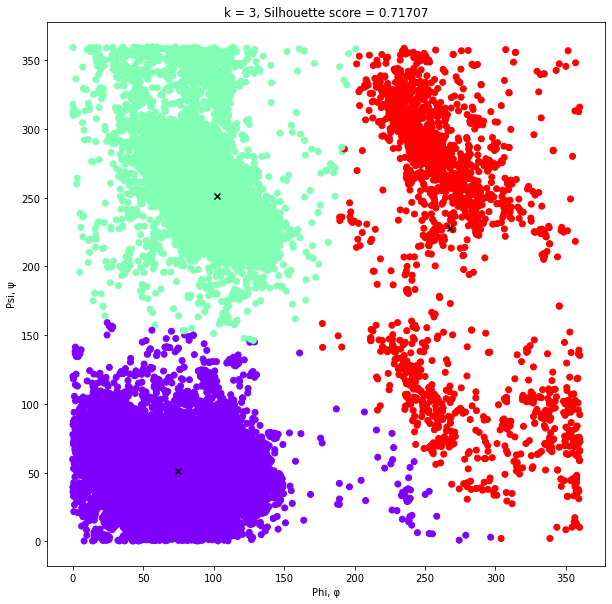

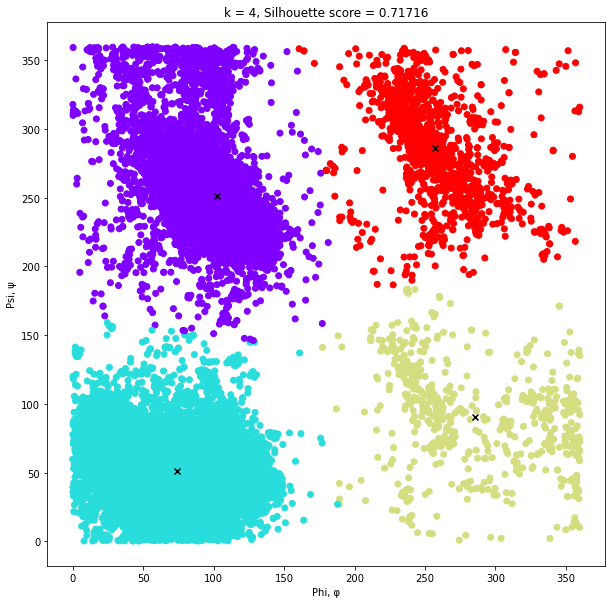

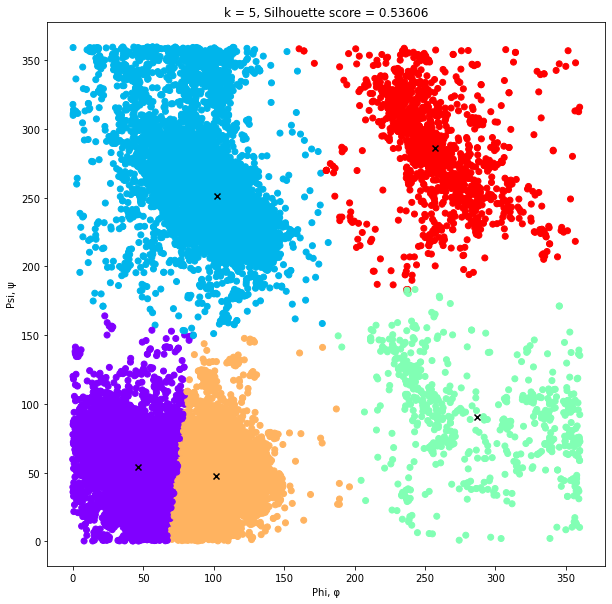

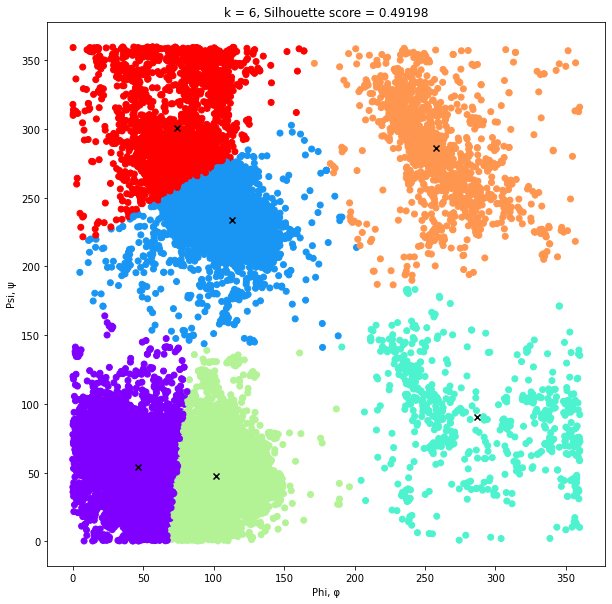

In [7]:
# Create a for loop that generates plots for k=2-6
for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_transform[['phi', 'psi']])

    plt.scatter(x=df_transform['phi'], y=df_transform['psi'], 
                c=kmeans.labels_, 
                cmap='rainbow')

    plt.scatter(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                c='black', 
                marker='x')
        
    plt.title(f"k = {k}, Silhouette score = "
                     f"{silhouette_score(df_transform[['phi', 'psi']], kmeans.labels_):,.5f}")
    plt.xlabel('Phi, φ')
    plt.ylabel('Psi, ψ')
    
    plt.show()

Estimated number of clusters: 116
Estimated number of noise points: 1440


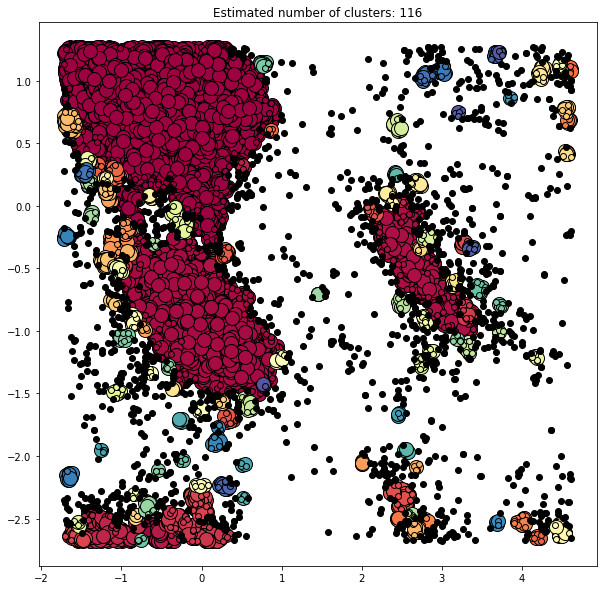

In [15]:
# Using code from "dbscan_intro" provided in course
db = DBSCAN(eps=3, min_samples=4).fit(df[['phi', 'psi']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

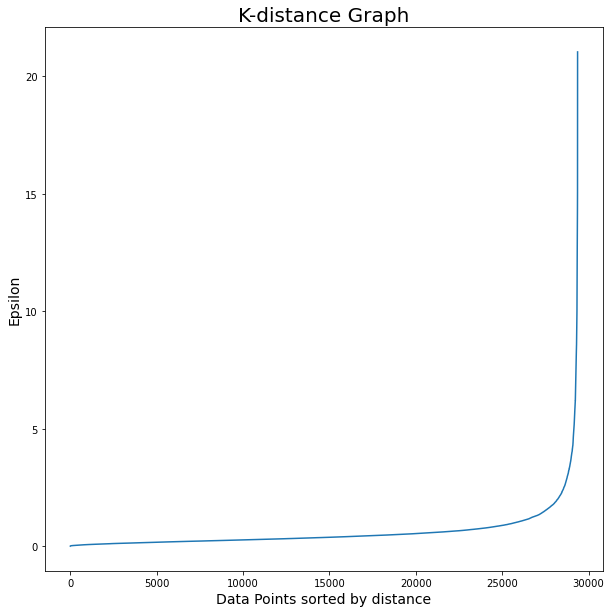

In [21]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df[['phi', 'psi']])
distances, indices = nbrs.kneighbors(df[['phi', 'psi']])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()